In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mt
mt.rcParams.update({'font.size': 12})

In [2]:
df  = pd.read_csv('../data/cdc_death_counts_by_condition_filtered.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace=True)
df.head()

,End Date,Group,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths
0,03/27/2021,By Total,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,4.0
1,03/27/2021,By Total,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,25.0
2,03/27/2021,By Total,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,60.0
3,03/27/2021,By Total,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,168.0
4,03/27/2021,By Total,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,429.0


In [3]:
df = df.drop(columns=['End Date','Group'])

In [4]:
display(df)

,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths
0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,4.0
1,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,25.0
2,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,60.0
3,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,168.0
4,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,429.0
...,...,...,...,...,...,...
9747,Puerto Rico,COVID-19,COVID-19,U071,45-54,154.0
9748,Puerto Rico,COVID-19,COVID-19,U071,55-64,287.0
9749,Puerto Rico,COVID-19,COVID-19,U071,65-74,500.0
9750,Puerto Rico,COVID-19,COVID-19,U071,75-84,544.0


In [5]:
df_group_by = df.groupby(['Condition','Age Group']).sum()
display(df_group_by)

COVID-19 Deaths
Condition                           Age Group                 
Adult respiratory distress syndrome 0-24                 218.0
                                    25-34                556.0
                                    35-44               1496.0
                                    45-54               4516.0
                                    55-64              10391.0
...                                                        ...
Vascular and unspecified dementia   45-54                161.0
                                    55-64                687.0
                                    65-74               4514.0
                                    75-84              15709.0
                                    85+                32480.0

[184 rows x 1 columns]

In [6]:
display(df_group_by.unstack().T)

Condition                  Adult respiratory distress syndrome  \
                Age Group                                        
COVID-19 Deaths 0-24                                     218.0   
                25-34                                    556.0   
                35-44                                   1496.0   
                45-54                                   4516.0   
                55-64                                  10391.0   
                65-74                                  15987.0   
                75-84                                  13879.0   
                85+                                     8778.0   

Condition                  All other conditions and causes (residual)  \
                Age Group                                               
COVID-19 Deaths 0-24                                            500.0   
                25-34                                          1444.0   
                35-44                                          3411.0   
                45-54                                          9527.0   
                55-64                                         25146.0   
                65-74                                         46525.0   
                75-84                                         56553.0   
                85+                                           58426.0   

Condition                  Alzheimer disease  COVID-19  Cardiac arrest  \
                Age Group                                                
COVID-19 Deaths 0-24                     0.0     959.0           169.0   
                25-34                    0.0    3435.0           532.0   
                35-44                   15.0    9074.0          1369.0   
                45-54                   55.0   25361.0          4044.0   
                55-64                  221.0   64550.0          9416.0   
                65-74                 1277.0  117018.0         15299.0   
                75-84                 5676.0  147935.0         17006.0   
                85+                  12647.0  163940.0         16458.0   

Condition                  Cardiac arrhythmia  Cerebrovascular diseases  \
                Age Group                                                 
COVID-19 Deaths 0-24                     79.0                      92.0   
                25-34                   146.0                     130.0   
                35-44                   283.0                     279.0   
                45-54                   789.0                     906.0   
                55-64                  2797.0                    2793.0   
                65-74                  7204.0                    5692.0   
                75-84                 12228.0                    7712.0   
                85+                   15918.0                    8779.0   

Condition                  Chronic lower respiratory diseases  Diabetes  \
                Age Group                                                 
COVID-19 Deaths 0-24                                     81.0     163.0   
                25-34                                   207.0     472.0   
                35-44                                   379.0    1720.0   
                45-54                                  1123.0    5283.0   
                55-64                                  4598.0   13572.0   
                65-74                                 11437.0   23461.0   
                75-84                                 15778.0   23951.0   
                85+                                   13570.0   16677.0   

Condition                  Heart failure  ...  Ischemic heart disease  \
                Age Group                 ...                           
COVID-19 Deaths 0-24                64.0  ...                    12.0   
                25-34              162.0  ...                   134.0   
                35-44              294.0  ...                   302.0   


([<matplotlib.axis.XTick at 0x7fefc90271c0>,
 [Text(0, 0, '0-24'),
  Text(1, 0, '25-34'),
  Text(2, 0, '35-44'),
  Text(3, 0, '45-54'),
  Text(4, 0, '55-64'),
  Text(5, 0, '65-74'),
  Text(6, 0, '75-84'),
  Text(7, 0, '85+')])

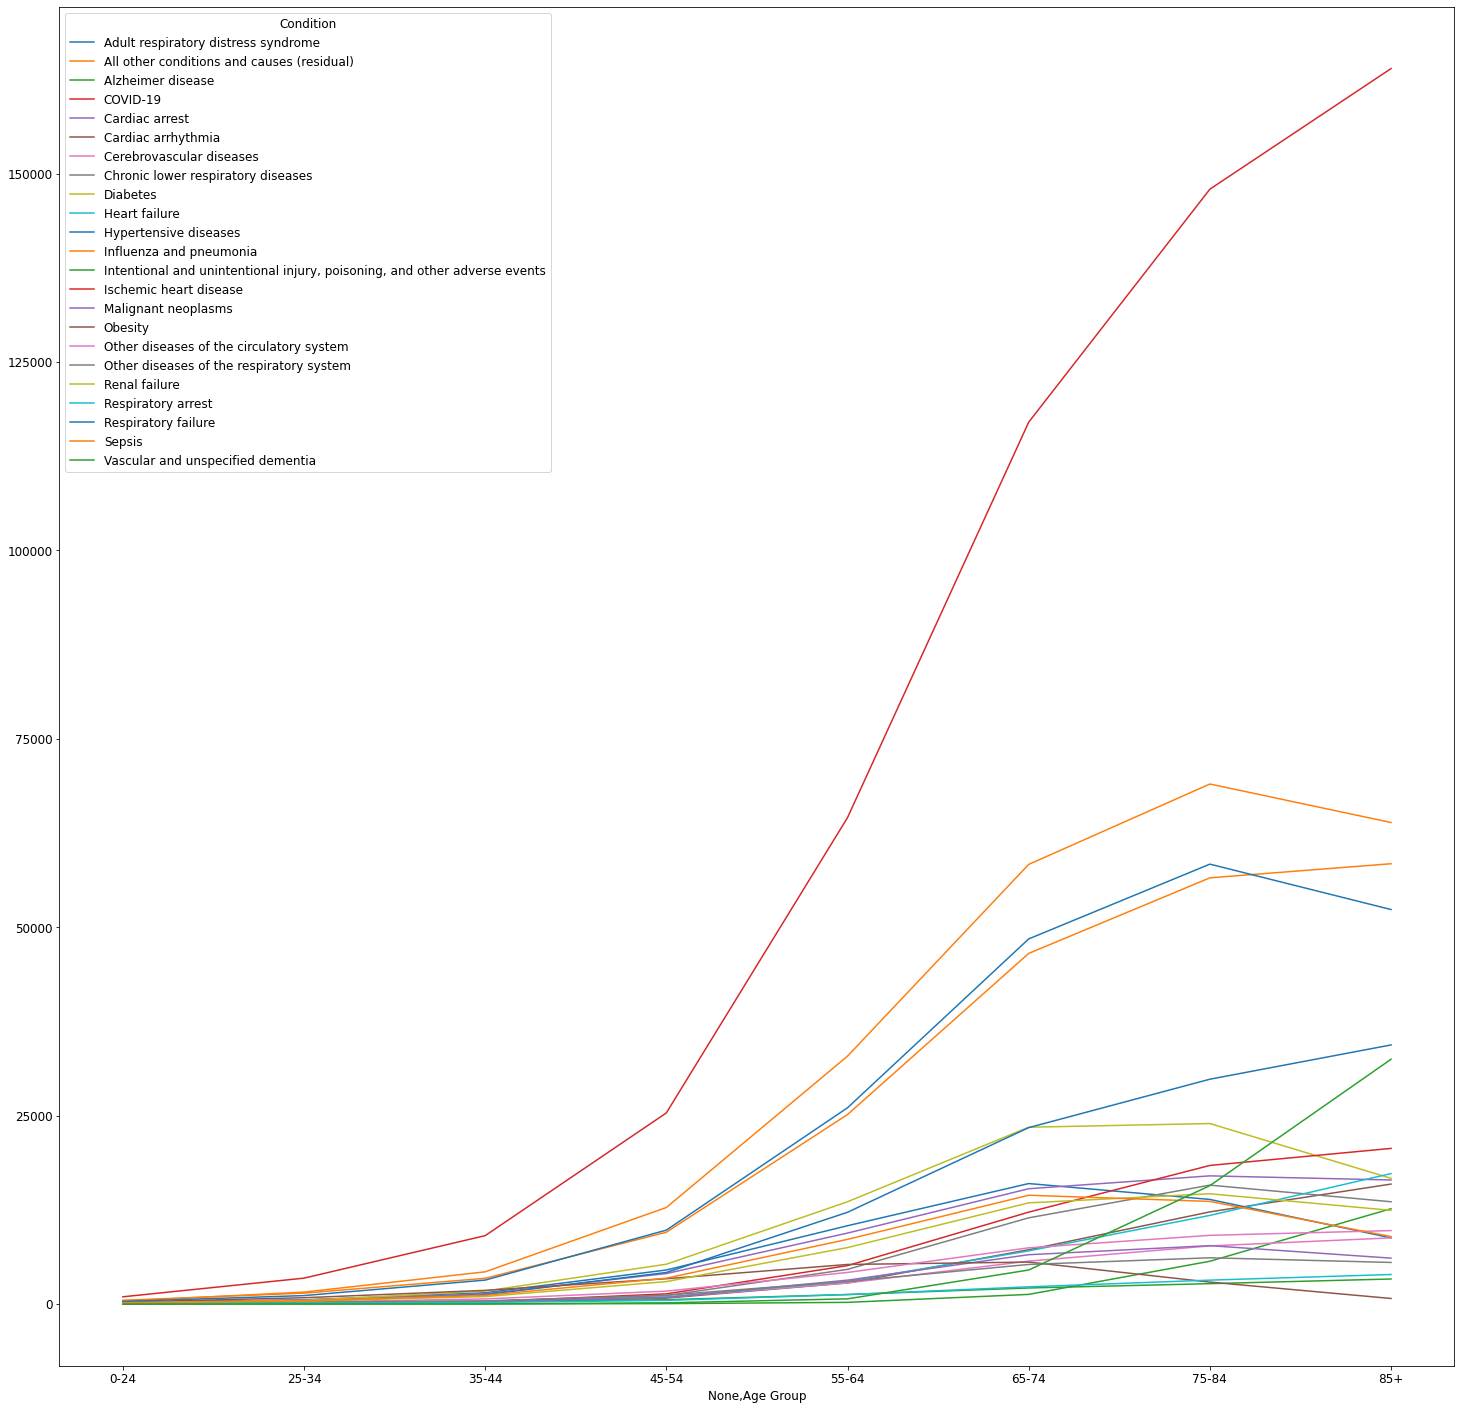

In [7]:

fig, ax = plt.subplots(figsize=(25,25))
df_group_by.unstack().T.plot(ax=ax)

plt.xticks(np.arange(8), ['0-24','25-34','35-44','45-54','55-64','65-74','75-84','85+'])

In [8]:
df_group_by_condition = df.groupby(["Condition"]).sum()
display(df_group_by_condition.sort_values("COVID-19 Deaths"))

,COVID-19 Deaths
Condition,
"Intentional and unintentional injury, poisoning, and other adverse events",10693.0
Respiratory arrest,11503.0
Alzheimer disease,19891.0
Obesity,20727.0
Other diseases of the respiratory system,21890.0
Malignant neoplasms,25008.0
Cerebrovascular diseases,26383.0
Other diseases of the circulatory system,33339.0
Cardiac arrhythmia,39444.0


In [9]:
selected_conditions = ["Influenza and pneumonia", "Respiratory failure", "Hypertensive diseases", "Diabetes", "Cardiac arrest" ,"Ischemic heart disease","Adult respiratory distress syndrome"]

([<matplotlib.axis.XTick at 0x7fef99ae3d30>,
 [Text(0, 0, '0-24'),
  Text(1, 0, '25-34'),
  Text(2, 0, '35-44'),
  Text(3, 0, '45-54'),
  Text(4, 0, '55-64'),
  Text(5, 0, '65-74'),
  Text(6, 0, '75-84'),
  Text(7, 0, '85+')])

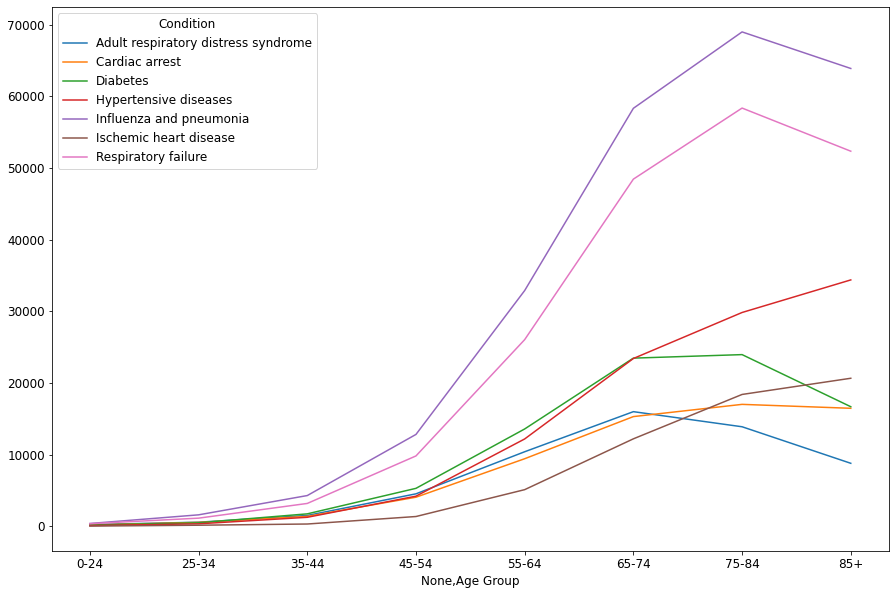

In [10]:
df_group_by_refined = df[df["Condition"].isin(selected_conditions)].groupby(['Condition','Age Group']).sum()
fig, ax = plt.subplots(figsize=(15,10))
df_group_by_refined.unstack().T.plot(ax=ax)
plt.xticks(np.arange(8), ['0-24','25-34','35-44','45-54','55-64','65-74','75-84','85+'])

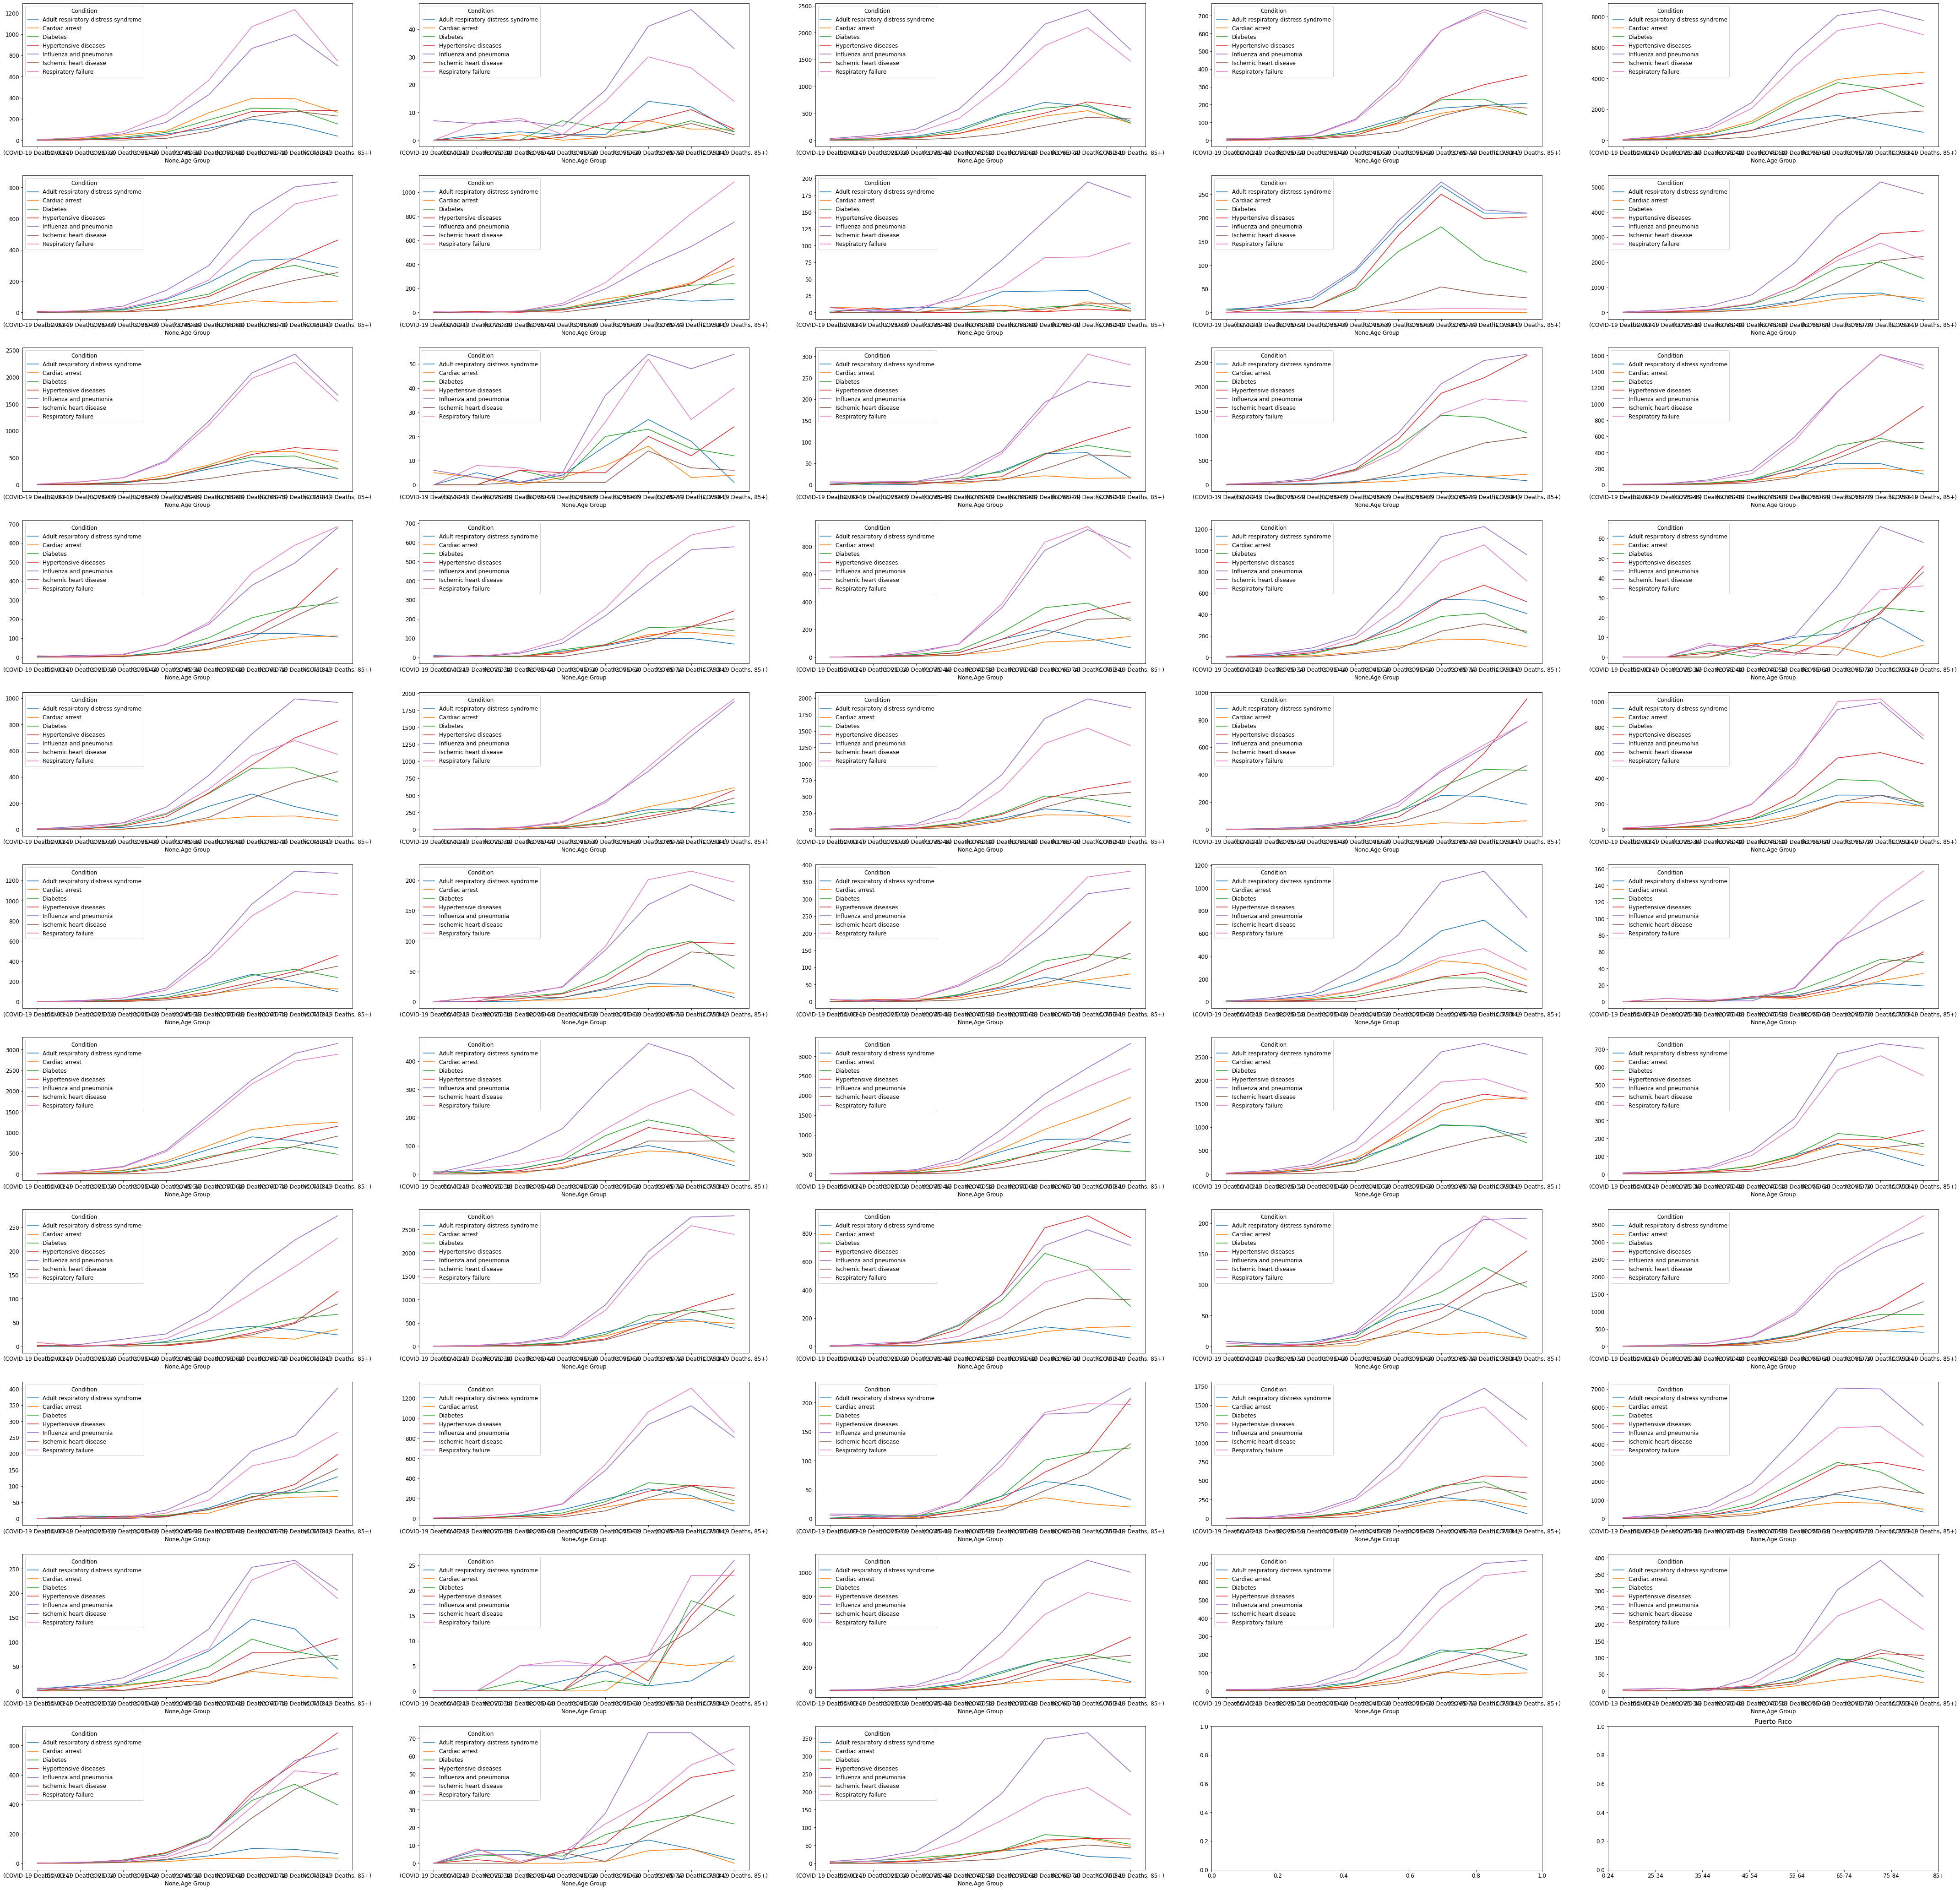

In [11]:
fig, axes = plt.subplots(nrows=11, ncols=5,figsize=(75,75)) # specifying the overall grid size
i = 0

list_of_states = df["State"].unique()
for state_name in list_of_states :
  df_state_temp = df[df["State"] == state_name]
  df_state_temp = df_state_temp[df_state_temp["Condition"].isin(selected_conditions)].groupby(['Condition','Age Group']).sum()
  df_state_temp.unstack().T.plot(ax = axes[int(i/5)][int(i%5)])
  plt.xticks(np.arange(8), ['0-24','25-34','35-44','45-54','55-64','65-74','75-84','85+'])
  plt.title(state_name)
  i = i+1
  
plt.show()



In [12]:
monthly_conditions_df = pd.read_csv('../data/cdc_death_counts_by_conditions_monthly.csv')
monthly_sex_age_deaths_df = pd.read_csv('../data/cdc_death_counts_by_sex_age_monthly.csv')

In [13]:
monthly_conditions_df.drop(['Unnamed: 0'], axis = 1, inplace=True)
monthly_sex_age_deaths_df.drop(['Unnamed: 0'], axis = 1, inplace=True)
display(monthly_conditions_df)
display(monthly_sex_age_deaths_df)

,Group,Year,Month,State,Condition Group,Condition,Age Group,COVID-19 Deaths
0,By Month,2020.0,1.0,Alabama,Respiratory diseases,Influenza and pneumonia,0-24,0.0
1,By Month,2020.0,2.0,Alabama,Respiratory diseases,Influenza and pneumonia,0-24,0.0
2,By Month,2020.0,3.0,Alabama,Respiratory diseases,Influenza and pneumonia,0-24,0.0
3,By Month,2020.0,4.0,Alabama,Respiratory diseases,Influenza and pneumonia,0-24,0.0
4,By Month,2020.0,5.0,Alabama,Respiratory diseases,Influenza and pneumonia,0-24,0.0
...,...,...,...,...,...,...,...,...
146275,By Month,2020.0,11.0,Puerto Rico,COVID-19,COVID-19,85+,59.0
146276,By Month,2020.0,12.0,Puerto Rico,COVID-19,COVID-19,85+,100.0
146277,By Month,2021.0,1.0,Puerto Rico,COVID-19,COVID-19,85+,58.0
146278,By Month,2021.0,2.0,Puerto Rico,COVID-19,COVID-19,85+,20.0


,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,2020.0,1.0,United States,All Sexes,Under 1 year,0.0,1778.0,41.0,0.0,8.0,49.0
1,2020.0,1.0,United States,All Sexes,5-14 years,0.0,470.0,21.0,0.0,29.0,50.0
2,2020.0,1.0,United States,All Sexes,15-24 years,0.0,2594.0,59.0,0.0,29.0,88.0
3,2020.0,1.0,United States,All Sexes,25-34 years,0.0,5213.0,180.0,0.0,89.0,269.0
4,2020.0,1.0,United States,All Sexes,35-44 years,0.0,7583.0,323.0,0.0,121.0,444.0
...,...,...,...,...,...,...,...,...,...,...,...
7285,2021.0,3.0,Puerto Rico,All Sexes,35-44 years,0.0,5.0,3.0,0.0,0.0,2.0
7286,2021.0,3.0,Puerto Rico,All Sexes,45-54 years,3.0,12.0,5.0,7.0,0.0,4.0
7287,2021.0,3.0,Puerto Rico,All Sexes,55-64 years,4.0,14.0,4.0,3.0,0.0,5.0
7288,2021.0,3.0,Puerto Rico,All Sexes,75-84 years,8.0,27.0,5.0,3.0,0.0,10.0


In [14]:
monthly_conditions_df_only_covid = monthly_conditions_df[monthly_conditions_df["Condition"] == "COVID-19"]

In [15]:
display(monthly_sex_age_deaths_df["Age Group"].unique())

array(['Under 1 year', '5-14 years', '15-24 years', '25-34 years',
       '35-44 years', '45-54 years', '55-64 years', '75-84 years',
       '85 years and over'], dtype=object)

In [16]:
dictionary = {'Under 1 year' : '0-24', '5-14 years' : '0-24', '15-24 years' : '0-24', 
              '25-34 years' : '25-34', '35-44 years' : '35-44', '45-54 years':'45-54', '55-64 years':'55-64',
              '75-84 years' : '75-84', '85 years and over' : '85+'}

In [17]:
monthly_sex_age_deaths_df.replace({"Age Group": dictionary},inplace=True)

In [18]:
display(monthly_sex_age_deaths_df)

,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,2020.0,1.0,United States,All Sexes,0-24,0.0,1778.0,41.0,0.0,8.0,49.0
1,2020.0,1.0,United States,All Sexes,0-24,0.0,470.0,21.0,0.0,29.0,50.0
2,2020.0,1.0,United States,All Sexes,0-24,0.0,2594.0,59.0,0.0,29.0,88.0
3,2020.0,1.0,United States,All Sexes,25-34,0.0,5213.0,180.0,0.0,89.0,269.0
4,2020.0,1.0,United States,All Sexes,35-44,0.0,7583.0,323.0,0.0,121.0,444.0
...,...,...,...,...,...,...,...,...,...,...,...
7285,2021.0,3.0,Puerto Rico,All Sexes,35-44,0.0,5.0,3.0,0.0,0.0,2.0
7286,2021.0,3.0,Puerto Rico,All Sexes,45-54,3.0,12.0,5.0,7.0,0.0,4.0
7287,2021.0,3.0,Puerto Rico,All Sexes,55-64,4.0,14.0,4.0,3.0,0.0,5.0
7288,2021.0,3.0,Puerto Rico,All Sexes,75-84,8.0,27.0,5.0,3.0,0.0,10.0


In [19]:
nyc_deaths_df = monthly_sex_age_deaths_df[monthly_sex_age_deaths_df["State"] == "New York"]

In [20]:
display(nyc_deaths_df)

,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
4455,2020.0,1.0,New York,All Sexes,0-24,0.0,47.0,8.0,0.0,0.0,7.0
4456,2020.0,1.0,New York,All Sexes,0-24,0.0,11.0,0.0,0.0,8.0,8.0
4457,2020.0,1.0,New York,All Sexes,0-24,0.0,64.0,4.0,0.0,0.0,4.0
4458,2020.0,1.0,New York,All Sexes,25-34,0.0,148.0,4.0,0.0,0.0,1.0
4459,2020.0,1.0,New York,All Sexes,35-44,0.0,179.0,6.0,0.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...
4585,2021.0,3.0,New York,All Sexes,35-44,3.0,164.0,3.0,5.0,0.0,11.0
4586,2021.0,3.0,New York,All Sexes,45-54,38.0,296.0,25.0,17.0,0.0,46.0
4587,2021.0,3.0,New York,All Sexes,55-64,113.0,771.0,103.0,61.0,0.0,155.0
4588,2021.0,3.0,New York,All Sexes,75-84,204.0,1627.0,191.0,90.0,0.0,305.0


In [21]:
nyc_deaths_df["Month/Year"] = nyc_deaths_df["Year"].astype(int).astype(str) + "/" + nyc_deaths_df["Month"].astype(int).astype(str)

/var/folders/vz/2yzyqj0s1n194lnk0xrjwt7m0000gn/T/ipykernel_92245/4225994253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_deaths_df["Month/Year"] = nyc_deaths_df["Year"].astype(int).astype(str) + "/" + nyc_deaths_df["Month"].astype(int).astype(str)


In [22]:
#nyc_deaths_df.drop(columns = ['Year','Month'], inplace = True)
display(nyc_deaths_df.groupby(['Month/Year']).sum())

,Year,Month,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
Month/Year,,,,,,,,
2020/1,18180.0,9.0,0.0,7539.0,646.0,0.0,61.0,698.0
2020/10,18180.0,90.0,222.0,7132.0,495.0,63.0,1.0,639.0
2020/11,18180.0,99.0,760.0,7662.0,740.0,250.0,4.0,1256.0
2020/12,18180.0,108.0,2572.0,9951.0,1449.0,939.0,14.0,3077.0
2020/2,18180.0,18.0,13.0,6966.0,554.0,2.0,67.0,617.0
2020/3,18180.0,27.0,555.0,8359.0,1077.0,334.0,83.0,1356.0
2020/4,18180.0,36.0,5752.0,14246.0,3706.0,2877.0,24.0,6602.0
2020/5,18180.0,45.0,2183.0,8824.0,1429.0,940.0,17.0,2670.0
2020/6,18180.0,54.0,490.0,6689.0,616.0,201.0,0.0,909.0
